In [1]:
import librosa as l
import librosa.display as display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import sklearn
import seaborn as sns

- задача 1 - скачать датасет
- задача 2 - представить данные в виде csv файлов по 5 признакам
- задача 3 - считать их как х и как y (придумать как ?)

<hr style="height:10px">

<font size=12>Описание датасета (характеристики)</font>

<font size=5>Всего собрано треков по 10 основным музыкальным жанрам</font>

In [3]:
for file in os.listdir("genres"):
    if file.find(".")==-1:
        print(file)

pop
metal
disco
blues
reggae
classical
rock
hiphop
country
jazz


<font size=5>По каждому из жанров собрано 100 аудиозаписей в формате .wav</font>

In [4]:
for file in os.listdir("genres"):
    if file.find(".")==-1:
        print(file)
        for track in sorted(os.listdir(f"genres/{file}")):
            print(f"---> {track}")
        print("\n")

pop
---> pop.00000.wav
---> pop.00001.wav
---> pop.00002.wav
---> pop.00003.wav
---> pop.00004.wav
---> pop.00005.wav
---> pop.00006.wav
---> pop.00007.wav
---> pop.00008.wav
---> pop.00009.wav
---> pop.00010.wav
---> pop.00011.wav
---> pop.00012.wav
---> pop.00013.wav
---> pop.00014.wav
---> pop.00015.wav
---> pop.00016.wav
---> pop.00017.wav
---> pop.00018.wav
---> pop.00019.wav
---> pop.00020.wav
---> pop.00021.wav
---> pop.00022.wav
---> pop.00023.wav
---> pop.00024.wav
---> pop.00025.wav
---> pop.00026.wav
---> pop.00027.wav
---> pop.00028.wav
---> pop.00029.wav
---> pop.00030.wav
---> pop.00031.wav
---> pop.00032.wav
---> pop.00033.wav
---> pop.00034.wav
---> pop.00035.wav
---> pop.00036.wav
---> pop.00037.wav
---> pop.00038.wav
---> pop.00039.wav
---> pop.00040.wav
---> pop.00041.wav
---> pop.00042.wav
---> pop.00043.wav
---> pop.00044.wav
---> pop.00045.wav
---> pop.00046.wav
---> pop.00047.wav
---> pop.00048.wav
---> pop.00049.wav
---> pop.00050.wav
---> pop.00051.wav
---> pop

<font size=5>Итого имеем:</font>
- 10х100=1000 аудиозаписей для обучения.
- Длина каждого составляет 30 секунд.
- Монофонические 16-битные аудиофайлы 
- Частота 22050 Гц
- формат .wav

<hr style="height:10px">

<font size=8>Предварительная обработка</font>

<font size=4>В аудиоанализе этот процесс в значительной степени основан на поиске компонентов аудиосигнала, которые могут помочь нам отличить его от других сигналов. <br><br>Прежде всего необходимо представить каждое аудио в числовом формате. Для этого будет использована библиотека LIBROSA.<br><br>Для представления каждого трека было выявлено 5 характеризующих показателей:</font>
- <font color="Blue" size=4>Спектральный центроид</font> (указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен «центр масс» для звука.)
- <font color="Blue" size=4>Спектральный спад</font> (мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах.)
- <font color="Blue" size=4>Скорость пересечения нуля</font> (вычисление числа пересечений нуля в пределах сегмента этого сигнала. Голосовой сигнал колеблется медленно.)
- <font color="Blue" size=4>Мел-частотные кепстральные коэффициенты (MFCC)</font> (небольшой набор признаков (обычно около 10–20), которые кратко описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса.)
- <font color="Blue" size=4>Цветность</font> (вектором признаков из 12 элементов, в котором указано количество энергии каждого высотного класса {C, C# D, D # E, …, B} в сигнале. Используется для описания меры сходства между музыкальными произведениями.)

<font size=5>Посмотрим на одном из треков, как это все выглядит:</font>

Простое отображение звука через волны:

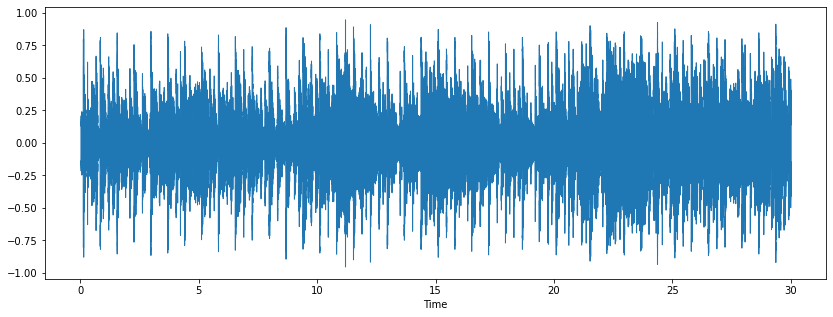

In [78]:
x2 , sr2 = l.load("genres/pop/"+os.listdir("genres/pop")[0])
plt.figure(figsize=(14, 5))
display.waveshow(x2, sr=sr2)

Спектограмма:

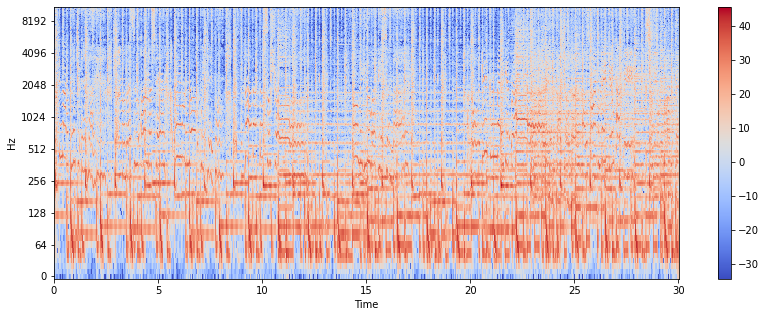

In [81]:
X = l.stft(x2)
Xdb = l.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
display.specshow(Xdb, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

Спектральный центроид:

<ipython-input-82-7f991955a078>:1: FutureWarning: Pass y=[ 0.03451538  0.04815674  0.06430054 ... -0.06954956 -0.1444397
 -0.19223022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = l.feature.spectral_centroid(x2, sr=sr2)[0]


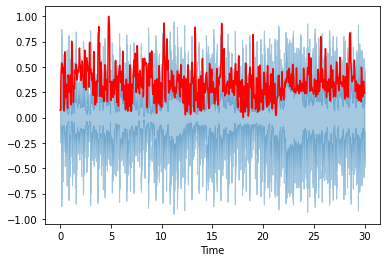

In [82]:
spectral_centroids = l.feature.spectral_centroid(x2, sr=sr2)[0]
spectral_centroids.shape
(775,)# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = l.frames_to_time(frames)# Normalising the spectral centroid for visualisation
def normalize(x2, axis=0):
    return sklearn.preprocessing.minmax_scale(x2, axis=axis)#Plotting the Spectral Centroid along the waveform
display.waveshow(x2, sr=sr2, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

Спектральный спад:

<ipython-input-83-c733355ab726>:1: FutureWarning: Pass y=[ 0.04451538  0.05815674  0.07430054 ... -0.05954956 -0.13443969
 -0.18223022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = l.feature.spectral_rolloff(x2+0.01, sr=sr2)[0]


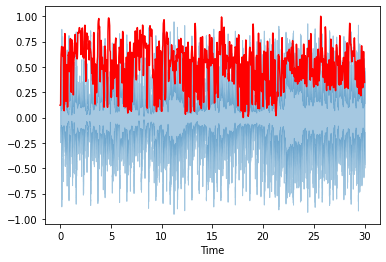

In [83]:
spectral_rolloff = l.feature.spectral_rolloff(x2+0.01, sr=sr2)[0]
display.waveshow(x2, sr=sr2, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

Коэффициенты MEL-частот:

<ipython-input-84-b512e095fcd7>:1: FutureWarning: Pass y=[ 0.03451538  0.04815674  0.06430054 ... -0.06954956 -0.1444397
 -0.19223022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = sklearn.preprocessing.scale(l.feature.mfcc(x2, sr=sr2), axis=1)
/Users/13polbr/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/13polbr/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


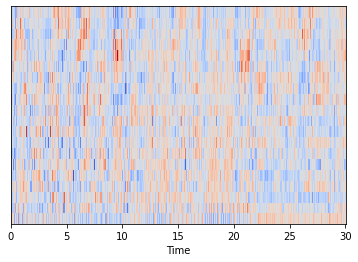

In [84]:
mfccs = sklearn.preprocessing.scale(l.feature.mfcc(x2, sr=sr2), axis=1)
display.specshow(mfccs, sr=sr2, x_axis='time')

Частоты цветности:

<ipython-input-85-7349cbb7ee8e>:2: FutureWarning: Pass y=[ 0.03451538  0.04815674  0.06430054 ... -0.06954956 -0.1444397
 -0.19223022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = l.feature.chroma_stft(x2, sr=sr2, hop_length=hop_length)


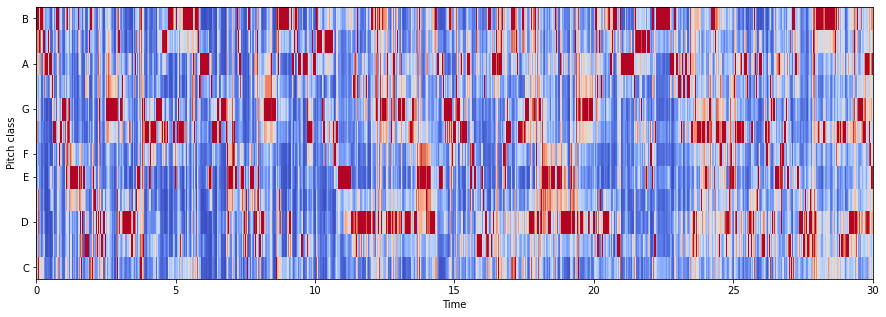

In [85]:
hop_length = 512
chromagram = l.feature.chroma_stft(x2, sr=sr2, hop_length=hop_length)
plt.figure(figsize=(15, 5))
display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

<font size=6>Шаг 1</font><br>
В первую очередь нужно преобразовать аудиофайлы в изображения(спектрограммы).<br> 
<font size =4 color="Brown">Спектрограмма</font> — это визуальный способ представления уровня или «громкости» сигнала во времени на различных частотах, присутствующих в форме волны. Обычно изображается в виде тепловой карты.

<font size=4>Подготовим заголовки для будущего .csv датасета</font>

In [75]:
headers = ["filename", "chroma_stft", "rmse", "spectral_centroid", 
           "spectral_bandwidth", "spectral_rolloff", "zero_crossing_rate"]
for i in range(1,21):
    headers.append(f"mfcc{i}")
headers.append("label")
print(headers)

with open("data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(headers)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<font size=4>Извлечем выбранные выше признаки для аудиофайла и запишем их в csv файл. Не забудем так же подписать жанр аудиофайла.</font>

In [76]:
for file in os.listdir("genres"):
    if file.find(".")==-1:
        directory_for_pics=f"images/{file}/"
        for track in sorted(os.listdir(f"genres/{file}")):
            y , sr = l.load(f"genres/{file}/{track}", mono=True, duration=30)
            #spectogramm(x, cmap, file, "".join(track.split(".")[:2])+".png") 
            rmse = l.feature.rms(y=y)[0]
            chroma_stft = l.feature.chroma_stft(y=y, sr=sr)
            spectral_centroid = l.feature.spectral_centroid(y=y, sr=sr)
            spectral_bandwidth = l.feature.spectral_bandwidth(y=y, sr=sr)
            spectral_rolloff = l.feature.spectral_rolloff(y=y, sr=sr)
            zero_crossing_rate = l.feature.zero_crossing_rate(y=y)
            mfcc = l.feature.mfcc(y=y, sr=sr)
            song_data = f"{track} {np.mean(rmse)} {np.mean(chroma_stft)} {np.mean(spectral_centroid)} \
            {np.mean(spectral_bandwidth)} {np.mean(spectral_rolloff)} {np.mean(zero_crossing_rate)}"
            for param in mfcc:
                song_data += f" {np.mean(param)}"
            song_data += f" {file}"
            with open("data.csv", "a", newline="") as f:
                writer = csv.writer(f)
                writer.writerow(song_data.split())
        print(f"Обработаны все аудио по жанру {file}")

Обработаны все аудио по жанру pop
Обработаны все аудио по жанру metal
Обработаны все аудио по жанру disco
Обработаны все аудио по жанру blues
Обработаны все аудио по жанру reggae
Обработаны все аудио по жанру classical
Обработаны все аудио по жанру rock
Обработаны все аудио по жанру hiphop
Обработаны все аудио по жанру country
Обработаны все аудио по жанру jazz


<font size=6>Шаг 2</font>

<font size=4>Загрузим данныу CSV, создадим метки, промасштабируем все признаки.</font>

In [2]:
data = pd.read_csv("data.csv")
data.head()


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00000.wav,0.185826,0.389715,3422.094681,3409.811125,7953.293574,0.126767,-94.534286,55.664608,29.260527,...,2.220707,-4.614716,-0.982661,-1.485521,3.132060,2.511770,4.095826,9.172982,4.736745,pop
1,pop.00001.wav,0.262186,0.412759,3702.928031,3431.802175,8073.092850,0.149476,-59.200977,45.285435,36.858238,...,1.896229,-0.919774,0.039758,0.093807,-0.824969,5.583771,3.828219,5.586191,4.933342,pop
2,pop.00002.wav,0.215166,0.417890,3213.516836,3269.596067,7423.946775,0.118869,-59.607124,62.982342,31.122061,...,4.254538,4.125680,5.727718,5.061071,5.671052,1.418249,2.818790,-1.406142,-3.378564,pop
3,pop.00003.wav,0.129355,0.410053,1837.191502,2067.012571,3671.069468,0.085352,-125.906784,126.618279,-23.186909,...,3.880194,-7.941657,2.048692,-2.335953,-1.481203,4.753124,-3.513924,4.886850,-3.199080,pop
4,pop.00004.wav,0.211165,0.384388,2753.221770,2861.410541,5986.188802,0.123763,-20.901945,83.241669,5.046960,...,-0.638733,-3.172270,1.546673,-0.917554,-2.959960,-1.330205,-0.869388,0.692302,-1.767042,pop


<font size=4>Удалим незначимый столбец с названием файла и все коэффициенты MEL-частот (mfcc) кроме mfcc1</font>

In [3]:
list_to_drop = [f"mfcc{i}" for i in range(2,21)]
list_to_drop.append("filename")
print(list_to_drop)
data = data.drop(list_to_drop, axis=1)
data.head()

['mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'filename']


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,label
0,0.185826,0.389715,3422.094681,3409.811125,7953.293574,0.126767,-94.534286,pop
1,0.262186,0.412759,3702.928031,3431.802175,8073.092850,0.149476,-59.200977,pop
2,0.215166,0.417890,3213.516836,3269.596067,7423.946775,0.118869,-59.607124,pop
3,0.129355,0.410053,1837.191502,2067.012571,3671.069468,0.085352,-125.906784,pop
4,0.211165,0.384388,2753.221770,2861.410541,5986.188802,0.123763,-20.901945,pop


<font size=4>Создадим метку на целевой переменной, которая является <u>категориальной</u></font>

In [4]:
genres = data["label"]

In [5]:
encoder = sklearn.preprocessing.LabelEncoder()

In [6]:
y = encoder.fit_transform(genres)

In [7]:
y[[0,100,200,300, 400, 500, 600, 700, 800, 900]]

array([7, 6, 3, 0, 8, 1, 9, 4, 2, 5])

<font size=4>Промасштабируем все признаки <u>(все являются числовыми)</u>.</font>

In [8]:
scaler = sklearn.preprocessing.StandardScaler()

In [9]:
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

In [10]:
X[0]

array([0.83734369, 0.13492555, 1.70517479, 2.21879214, 2.14843192,
       0.55315923, 0.49872952])

<font size=4>Выведем информацию о количественных характеристиках итогового датасета (обратимся к pandas dataframe-у, чтобы получить также названия признаков):</font>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         1000 non-null   float64
 1   rmse                1000 non-null   float64
 2   spectral_centroid   1000 non-null   float64
 3   spectral_bandwidth  1000 non-null   float64
 4   spectral_rolloff    1000 non-null   float64
 5   zero_crossing_rate  1000 non-null   float64
 6   mfcc1               1000 non-null   float64
 7   label               1000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 62.6+ KB


In [12]:
data.shape

(1000, 8)

<font size=4>Итоги: <br><ul><li>1000 записей, <li>7 признаков (не считая целевой переменной), <li>признаки числовые</ul></font>

<font size=4 color="blue">На этом работу с датасетом и предобработку данных можно считать завершенной.</font>

<hr style="height:10px">

<font size=8>Описательный анализ признаков</font>

In [13]:
x1, x2, x3, x4, x5, x6, x7 = [],[],[],[],[],[],[]
for row in X:
    x1.append(row[0])
    x2.append(row[1])
    x3.append(row[2])
    x4.append(row[3])
    x5.append(row[4])
    x6.append(row[5])
    x7.append(row[6])
X_analytics = [x1, x2, x3, x4, x5, x6, x7]

<font size=6>Выявление аномальных значений</font>

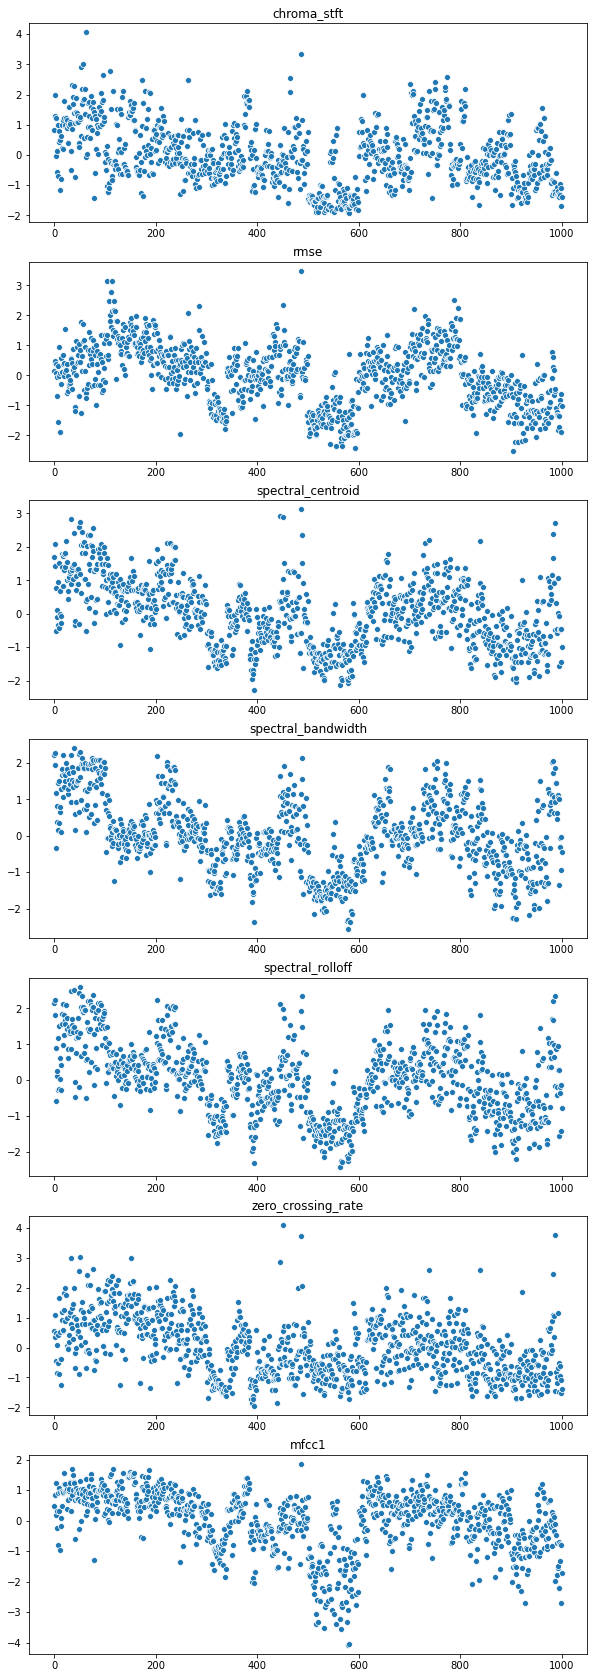

In [64]:
ig, axs = plt.subplots(nrows=7, figsize=(10,30))
columns_for_build=["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", \
                   "spectral_rolloff", "zero_crossing_rate", "mfcc1"]
for i in range(7):
    for_y = X_analytics[i]
    for_x = np.linspace(0,1000,1000)
    sns.lineplot(x=for_x, y=for_y, ax=axs[i],  linestyle='', marker='o')
    axs[i].set_title(columns_for_build[i])

Видно, что на графиках иногда есть выделяющиеся точки-значения. Для каждого проверим, действительно ли это выборсы:

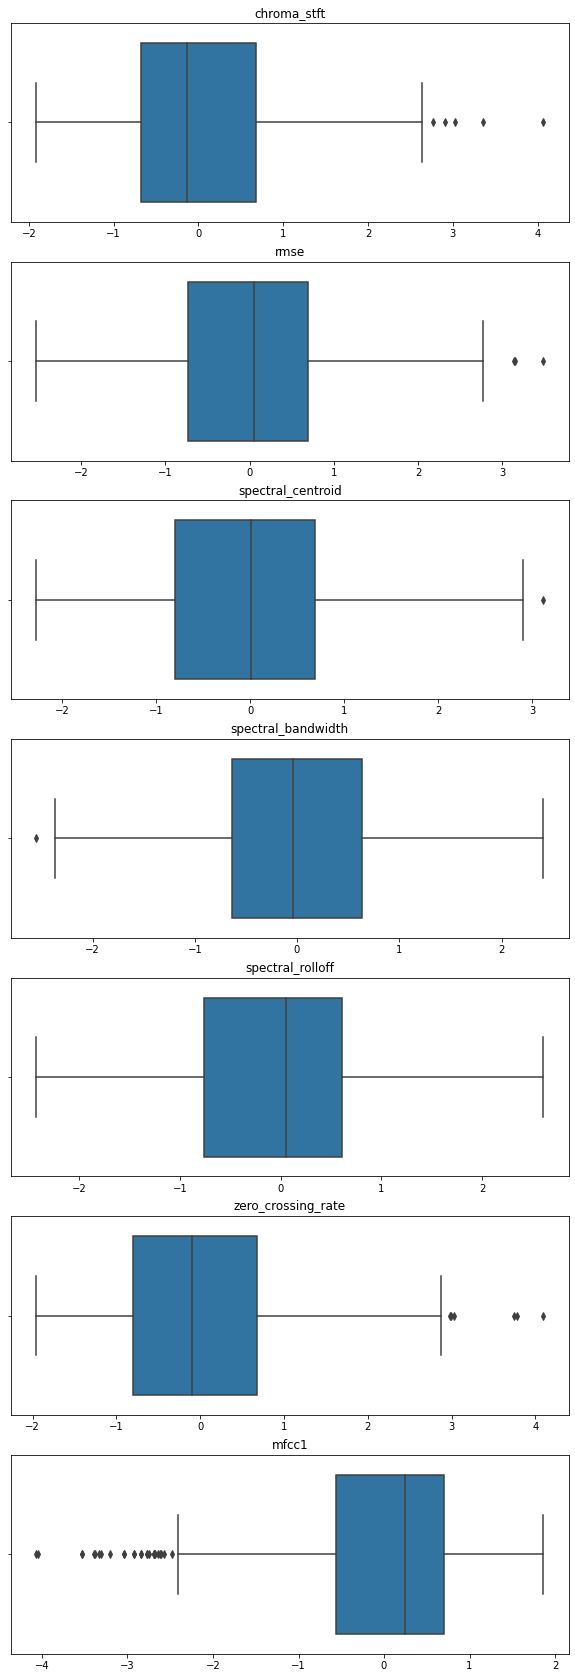

In [65]:
ig, axs = plt.subplots(nrows=7, figsize=(10,30))
columns_for_build=["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", \
                   "spectral_rolloff", "zero_crossing_rate", "mfcc1"]
for i in range(7):
    for_y = X_analytics[i]
    for_x = np.linspace(0,1000,1000)
    sns.boxplot(x=for_y, ax=axs[i])
    axs[i].set_title(columns_for_build[i])

Видим, что действительно есть аномальные значения. На данном этапе я считаю нелогичным их удалять. Есть вероятность, что эти выбросы могут однозначно определять какой-то жанр музыки. К тому же выборка достаточно небольшая (1000 записей), поэтому поспешно удалять данные может быть чревато плохим обучением.

<font size=6>Визуализация распределения каждого признака</font>

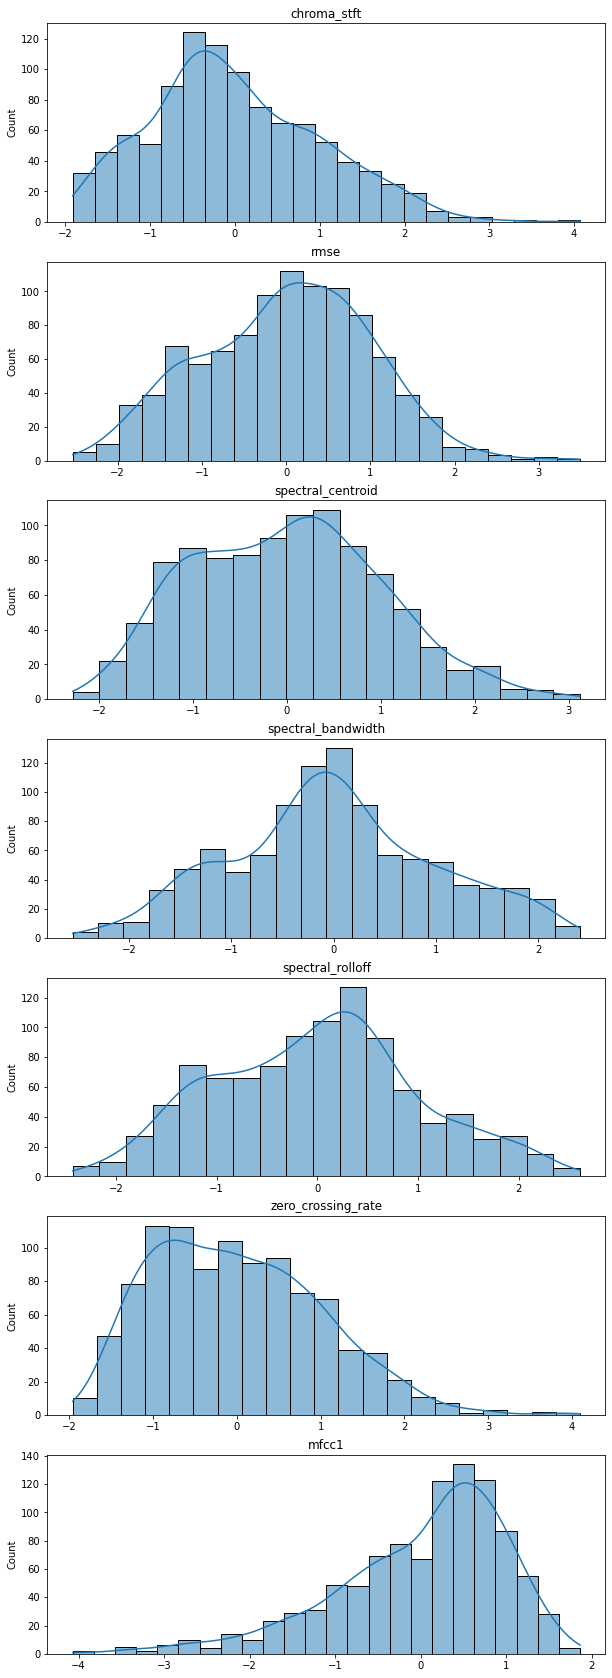

In [66]:
ig, axs = plt.subplots(nrows=7, figsize=(10,30))
columns_for_build=["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", \
                   "spectral_rolloff", "zero_crossing_rate", "mfcc1"]
for i in range(7):
    for_y = X_analytics[i]
    for_x = np.linspace(0,1000,1000)
    sns.histplot(x=for_y, ax=axs[i], kde=True)
    axs[i].set_title(columns_for_build[i])

<font size=6>Построение кореллограмм</font>

In [14]:
df = pd.DataFrame()
df["y"] = y
for i in range(1,8):
    df[f"x{i}"] = X_analytics[i-1]
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,y,x1,x2,x3,x4,x5,x6,x7
y,1.000000,0.213907,0.366260,0.378400,0.388816,0.385239,0.268267,0.340030
x1,0.213907,1.000000,0.499659,0.509990,0.529758,0.537720,0.332126,0.807289
x2,0.366260,0.499659,1.000000,0.615639,0.517539,0.598003,0.554862,0.659270
x3,0.378400,0.509990,0.615639,1.000000,0.904431,0.979629,0.874746,0.720810
x4,0.388816,0.529758,0.517539,0.904431,1.000000,0.956195,0.612297,0.648335
x5,0.385239,0.537720,0.598003,0.979629,0.956195,1.000000,0.779785,0.721715
x6,0.268267,0.332126,0.554862,0.874746,0.612297,0.779785,1.000000,0.634121
x7,0.340030,0.807289,0.659270,0.720810,0.648335,0.721715,0.634121,1.000000


Все признаки имеют примерно одинаковое влияние на целевую переменную <u>(около 0.3-0.4)</u>

<font size=6>Совместные распределения каждого признака с целевой переменной</font>

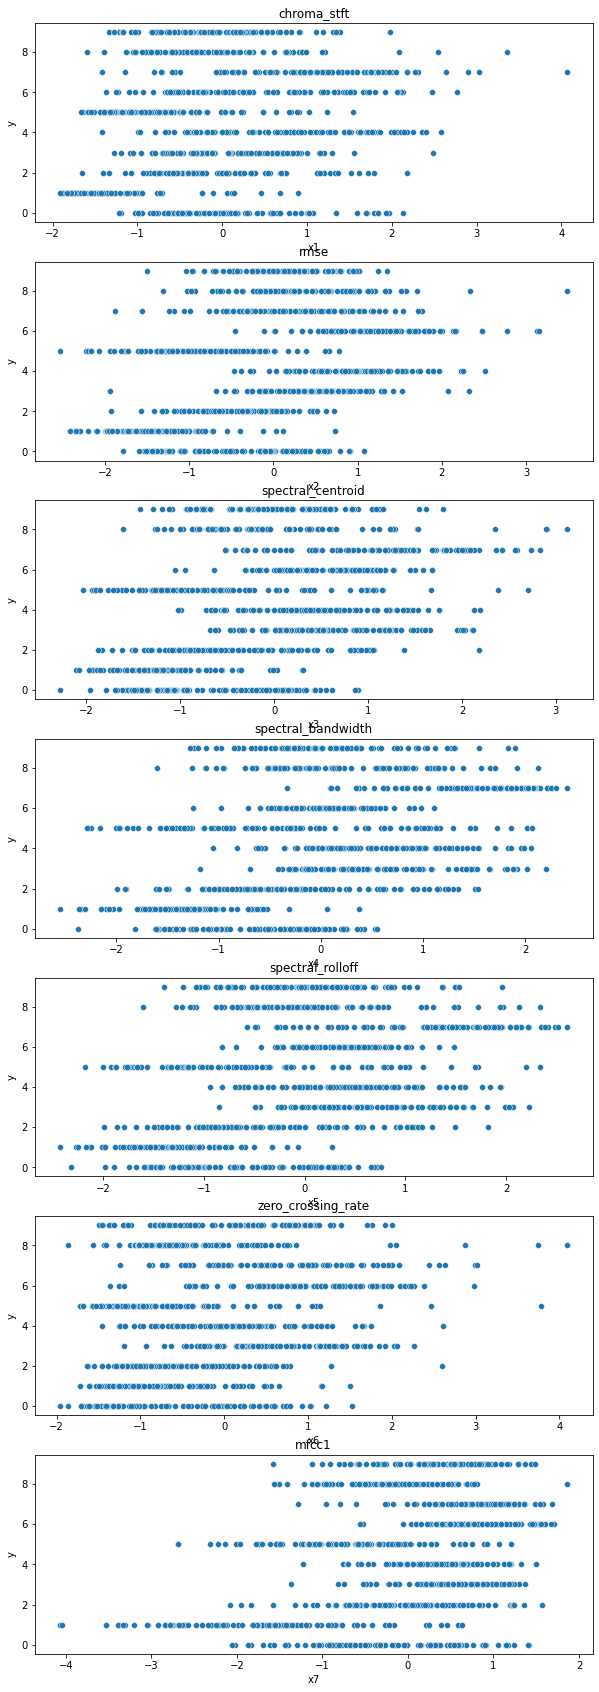

In [91]:
ig, axs = plt.subplots(nrows=7, figsize=(10,30))
columns_for_build=["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", \
                   "spectral_rolloff", "zero_crossing_rate", "mfcc1"]
for name in df.columns[1:]:
    sns.scatterplot(data=df, x=name, y="y", ax=axs[int(name[-1])-1])
    axs[int(name[-1])-1].set_title(columns_for_build[int(name[-1])-1])

<font size=6>Выявление коррелированных признаков и признаков, не несущих информации для данной задачи.</font>

Все признаки примерно одинаково коррелируют с целевой переменной, график совместного распределения так же подтверждает наличие обычное средней связи.

<hr style="height:10px">

<font size=8>Разделение набора данных на обучающую и тестовую выборки</font>

In [37]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.12, random_state=42)

<hr style="height:10px">

<font size=8>Обучить несколько моделей для решения выбранной задачи</font>

<font size=4 color="blue">Logistic regression (Логистическая регрессия)</font>

In [38]:
model1 = sklearn.linear_model.LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.49166666666666664

Text(0.5, 15.0, 'Предсказанные значения')

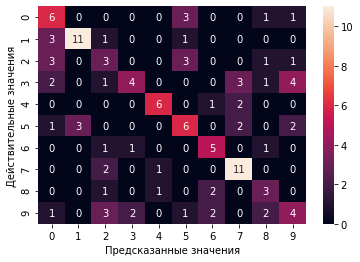

In [39]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
логистическая регрессия плохо справляется

<font size=4 color="blue">Метод k-ближайших соседей (K-Nearest Neighbors)</font>

In [42]:
model2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred2)

0.5333333333333333

Text(0.5, 15.0, 'Предсказанные значения')

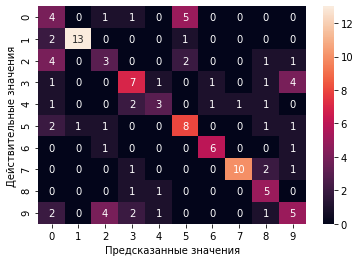

In [43]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test, y_pred2)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
Лучше, но все еще беда

<font size=4 color="blue">Метод опорных векторов (Support Vector Machines)</font>

In [47]:
model3 = sklearn.svm.SVC()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred3)

0.525

Text(0.5, 15.0, 'Предсказанные значения')

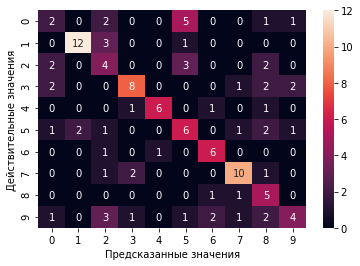

In [48]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test, y_pred3)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
опять плохо, видим, что жанры 1/3/7 определяются довольно точно

<font size=4 color="blue">Классификатор дерева решений (Decision Tree Classifier)</font>

In [56]:
model4 = sklearn.tree.DecisionTreeClassifier(random_state=5)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred4)

0.4166666666666667

Text(0.5, 15.0, 'Предсказанные значения')

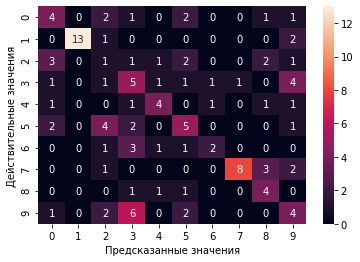

In [57]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test, y_pred4)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

<font size=4 color="blue">Случайный лес (Random Forests)</font>

In [79]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(max_depth=16, random_state=0)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred5)

0.575

Text(0.5, 15.0, 'Предсказанные значения')

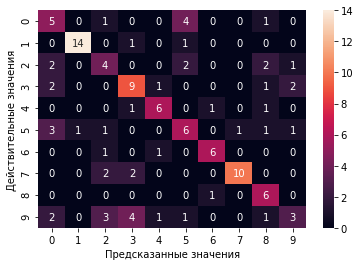

In [80]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test, y_pred5)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

<font size=4 color="blue">Наивный байесовский метод (Naive Bayes)</font>

In [82]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred6)

0.35833333333333334

Text(0.5, 15.0, 'Предсказанные значения')

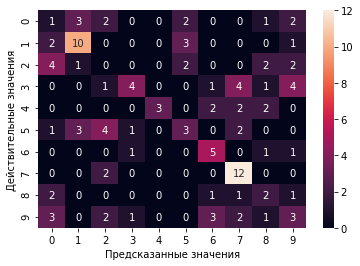

In [83]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test, y_pred6)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

<font size=4 color="blue">Линейный дискриминантный анализ (Linear Discriminant Analysis)</font>

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model7 = LinearDiscriminantAnalysis()
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred7)

0.5166666666666667

Text(0.5, 15.0, 'Предсказанные значения')

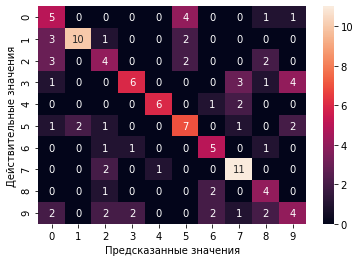

In [89]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test, y_pred7)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

<font size=4 color="blue">Neural network models (supervised)</font>

In [126]:
from sklearn.neural_network import MLPClassifier
model8 = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(25, ), random_state=2)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred8)

/Users/13polbr/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6166666666666667

<hr style="height:10px">

<font size=8>Улучшение модели</font>

Так как на базовый данных лучший результат дала модель <font color="red">MLPClassifier (многослойный перцептрон (MLP), который обучается с использованием обратного распространения) из класса моделей нейронных сетей</font>, постараемся подробнее проанализировать результаты и улучшить именно эту модель

Прежде всего необходимо <font color="blue">добавить пару параметров из отряда mfcc-характеристик</font>, которые были проигнорированы при предварительной обработке датасета. Вернем 2-3 признака

In [135]:
list_to_drop = [f"mfcc{i}" for i in range(4,21)]
list_to_drop.append("filename")
print(list_to_drop)
data = data.drop(list_to_drop, axis=1)
data.head()

['mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'filename']


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,label
0,0.185826,0.389715,3422.094681,3409.811125,7953.293574,0.126767,-94.534286,55.664608,29.260527,pop
1,0.262186,0.412759,3702.928031,3431.802175,8073.092850,0.149476,-59.200977,45.285435,36.858238,pop
2,0.215166,0.417890,3213.516836,3269.596067,7423.946775,0.118869,-59.607124,62.982342,31.122061,pop
3,0.129355,0.410053,1837.191502,2067.012571,3671.069468,0.085352,-125.906784,126.618279,-23.186909,pop
4,0.211165,0.384388,2753.221770,2861.410541,5986.188802,0.123763,-20.901945,83.241669,5.046960,pop


In [136]:
genres = data["label"]
encoder = sklearn.preprocessing.LabelEncoder()
y = encoder.fit_transform(genres)
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         1000 non-null   float64
 1   rmse                1000 non-null   float64
 2   spectral_centroid   1000 non-null   float64
 3   spectral_bandwidth  1000 non-null   float64
 4   spectral_rolloff    1000 non-null   float64
 5   zero_crossing_rate  1000 non-null   float64
 6   mfcc1               1000 non-null   float64
 7   mfcc2               1000 non-null   float64
 8   mfcc3               1000 non-null   float64
 9   label               1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 78.2+ KB


<font size=6 color="blue">Так же:</font>
- установим параметр activation: функцию активации для скрытых слоев модели
- установим параметр solver: алгоритм присвоения весов узлам слоев модели
- сделаем тестовую выборку еще меньше
- изменим состав обучающей выборки и убедимся, что в нее 100% попадут все жанры для обучения

In [138]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.1, random_state=11)

In [15]:
from sklearn.neural_network import MLPClassifier
model8 = MLPClassifier(solver='adam', alpha=2e-5, hidden_layer_sizes=(200,), max_iter=800, activation = 'relu', 
                      random_state=11)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred8)

0.86012631244


<font size=6 color="blue">Представление результатов моделирования</font>

<font size=4>Прежде всего построим кривую обучения</font>

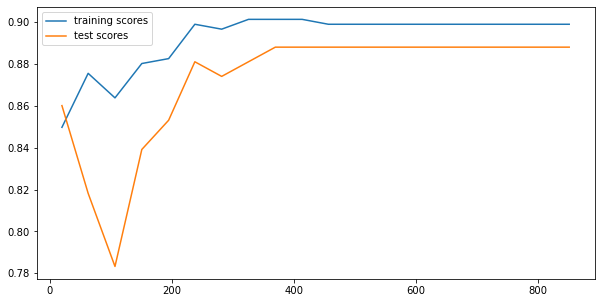

In [90]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(x_train), 20):
    
    model = MLPClassifier(solver='adam', alpha=2e-5, hidden_layer_sizes=(200,), max_iter=800, activation = 'relu', 
                      random_state=11) 
    X = x_train[:int(i)]
    y = y_train[:int(i)]
    model.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Видим, что модель обучалась достаточно равномерно, <font color="swamp">не недообучена и не переобучена</font>, но заметно <font color="brick">явное проседание </font> точности в начале обучения

<font size=4>Теперь отобразим матрицу точности предсказаний</font>

Text(0.5, 15.0, 'Предсказанные значения')

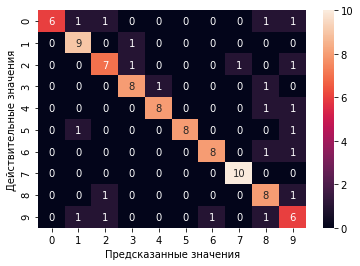

In [100]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_train, y_pred8)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

<font size=5>Ну и для проверки работы попробуем предсказать по случайно выбранно1 песне из моего плей-листа ее жанр нашей моделью:</font>.

    Выбранный трек: SUGAR - BROCKHAMPTON

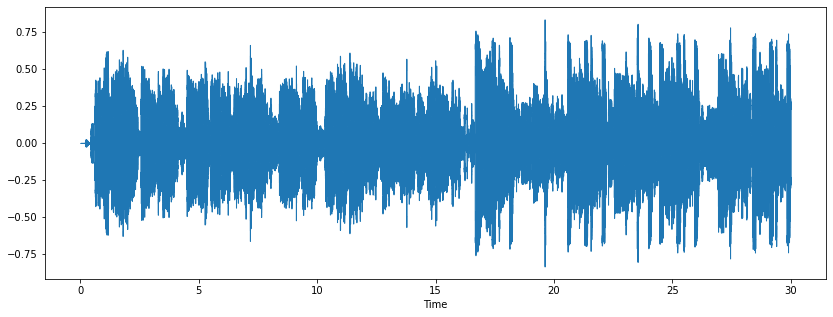

In [141]:
y , sr = l.load("SUGAR-BROCKHAMPTON.wav", mono=True, duration=30)
plt.figure(figsize=(14, 5))
display.waveshow(y, sr=sr)

In [142]:
rmse = l.feature.rms(y=y)[0]
chroma_stft = l.feature.chroma_stft(y=y, sr=sr)
spectral_centroid = l.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = l.feature.spectral_bandwidth(y=y, sr=sr)
spectral_rolloff = l.feature.spectral_rolloff(y=y, sr=sr)
zero_crossing_rate = l.feature.zero_crossing_rate(y=y)
mfcc = l.feature.mfcc(y=y, sr=sr)[:3]
song_data = [np.mean(rmse), np.mean(chroma_stft), np.mean(spectral_centroid), \
            np.mean(spectral_bandwidth), np.mean(spectral_rolloff), np.mean(zero_crossing_rate)]
for param in mfcc:
             song_data.append(np.mean(param))
song_data

[0.1543215,
 0.35554212,
 1825.0179778442707,
 1995.130679414567,
 3968.526002866196,
 0.0799590781008127,
 -163.41167,
 105.124504,
 -8.068354]

In [143]:
x = scaler.fit_transform([[i] for i in song_data])
x = [el[0] for el in x]
x

[-0.6341889511017369,
 -0.6340402100487109,
 0.7147391375119652,
 0.84048540933956,
 2.299207200689809,
 -0.6342439193555118,
 -0.7550959324518098,
 -0.5565956321373299,
 -0.6402671024462353]

In [145]:
model8.predict([x])

array([4])


Если обратиться выше, где мы преобразовывали названия жанров в индексы, то сможем убедиться, что <font color='swamp'>под цифрой 4 закодирован Hip-hop, что соответствует жанру треков исполнителя.</font>